# This notebook goes through using OSMNX to extract OSM data

In [1]:
import geopandas as gpd
import json
import networkx as nx
import pandas as pd
import osmnx as ox

# methods

In [84]:
def point_df_to_geojson(df: pd.DataFrame, properties: list):
    """
    Author: Geoff Boeing:
    https://geoffboeing.com/2015/10/exporting-python-data-geojson/
    """
    
    geojson = {"type": "FeatureCollection", "features": []}
    for _, row in df.iterrows():
        feature = {
            "type": "Feature",
            "properties": {},
            "geometry": {"type": "Point", "coordinates": []},
        }
        feature["geometry"]["coordinates"] = [row["geometry"].x, row["geometry"].y]
        for prop in properties:
            feature["properties"][prop] = row[prop]
        geojson["features"].append(feature)
    return geojson

In [81]:
def link_df_to_geojson(df, properties):
    """
    Author: Geoff Boeing:
    https://geoffboeing.com/2015/10/exporting-python-data-geojson/
    """
    geojson = {"type":"FeatureCollection", "features":[]}
    for _, row in df.iterrows():
        feature = {"type":"Feature",
                   "properties":{},
                   "geometry":{"type":"LineString",
                               "coordinates":[]}}
        feature["geometry"]["coordinates"] = [[x, y] for (x,y) in list(row["geometry"].coords)]
        for prop in properties:
            feature["properties"][prop] = row[prop]
        geojson["features"].append(feature)
    return geojson

In [ ]:
county_shape_folder = "../data/external/county/"
osmnx_data_folder = "../data/interim/osmnx_extraction/"

# read polygon boundry for Bay Area, and run OSM extraction for links and nodes

In [47]:
# polygon boundry
county_polys_gdf = gpd.read_file(county_shape_folder + "county_5m - Copy.shp")
county_polys_gdf.crs

# project to lat-long
county_polys_gdf = county_polys_gdf.to_crs(epsg = 4326)
boundary = county_polys_gdf.geometry.unary_union
#boundary = county_polys_gdf.iloc[3].geometry

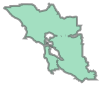

In [79]:
boundary

In [80]:
# OSM extraction

G_drive = ox.graph_from_polygon(boundary, network_type='all', simplify=False)

link_gdf = ox.graph_to_gdfs(G_drive, nodes = False, edges = True)
node_gdf = ox.graph_to_gdfs(G_drive, nodes = True, edges = False)

In [92]:
link_gdf.columns

Index(['access', 'area', 'bridge', 'est_width', 'geometry', 'highway',
       'junction', 'key', 'landuse', 'lanes', 'length', 'maxspeed', 'name',
       'oneway', 'osmid', 'ref', 'service', 'tunnel', 'u', 'v', 'width'],
      dtype='object')

# writing out OSM link data to geojson

In [82]:
link_prop = link_gdf.drop("geometry", axis = 1).columns.tolist()
link_geojson = link_df_to_geojson(link_gdf, link_prop)

In [83]:
with open(osmnx_data_folder + "link.geojson", "w") as f:
    json.dump(link_geojson, f)

# writing out OSM node data to geojson

In [85]:
node_prop = node_gdf.drop("geometry", axis = 1).columns.tolist()
node_geojson = point_df_to_geojson(node_gdf, node_prop)

In [86]:
with open(osmnx_data_folder + "node.geojson", "w") as f:
    json.dump(node_geojson, f)

In [28]:
# export polygon to geojson for shst node js
i = 1
for g in county_polys_gdf.geometry:
    
    boundary_gdf = gpd.GeoDataFrame({"geometry" : gpd.GeoSeries(g)})

    boundary_gdf.to_file(county_shape_folder + "boundary_" + str(i) + ".geojson",
                        driver = "GeoJSON")
    i += 1

In [87]:
# save osmnx routing file, no need to run
# ox.save_load.save_graphml(G_drive, "Z:/Data/Users/Sijia/MTC/osmnx_extraction/all.graphml")

# other tests

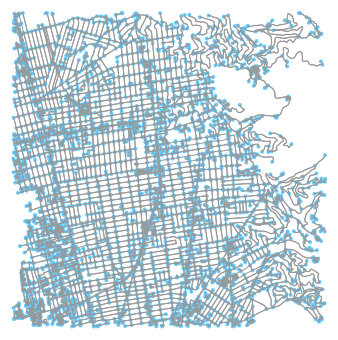

(<Figure size 544.036x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x140627bb908>)

In [35]:
# extract for berkeley
G_Ber = ox.graph_from_point((37.863360, -122.265067), distance = 3000, network_type="bike")
ox.plot_graph(G_Ber)

In [36]:
link_gdf = ox.graph_to_gdfs(G_Ber, nodes = False, edges = True)
node_gdf = ox.graph_to_gdfs(G_Ber, nodes = True, edges = False)

link_prop = link_gdf.drop("geometry", axis = 1).columns.tolist()
link_geojson = link_df_to_geojson(link_gdf, link_prop)

with open(osmnx_data_folder + "sf/link_bike_berkeley.geojson", "w") as f:
    json.dump(link_geojson, f)

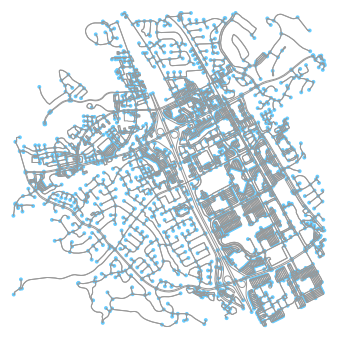

In [44]:
# extract for berkeley
G_Ber = ox.graph_from_point((37.773, -121.975), distance = 2000, network_type="all")
ox.plot_graph(G_Ber)

link_gdf = ox.graph_to_gdfs(G_Ber, nodes = False, edges = True)
node_gdf = ox.graph_to_gdfs(G_Ber, nodes = True, edges = False)

link_prop = link_gdf.drop("geometry", axis = 1).columns.tolist()
link_geojson = link_df_to_geojson(link_gdf, link_prop)

with open(osmnx_data_folder + "sf/link_all_SamRamon.geojson", "w") as f:
    json.dump(link_geojson, f)

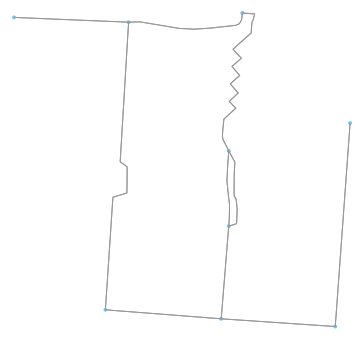

In [74]:
# extract for sample
G_Ber = ox.graph_from_point((37.7376519, -122.40976230000001), distance = 100, network_type="all")
ox.plot_graph(G_Ber)

link_gdf = ox.graph_to_gdfs(G_Ber, nodes = False, edges = True)

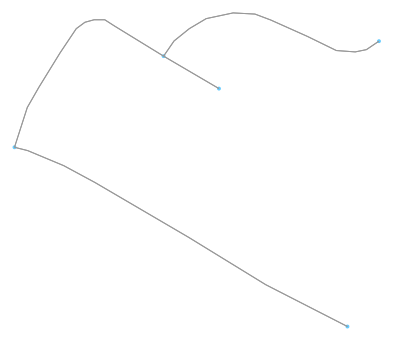

In [27]:
# extract for sample
G_Ber = ox.graph_from_point((37.4485547, -121.8785988), distance = 300, network_type="all")
ox.plot_graph(G_Ber)

link_gdf = ox.graph_to_gdfs(G_Ber, nodes = False, edges = True)
node_gdf = ox.graph_to_gdfs(G_Ber, nodes = True, edges = False)

In [26]:
link_gdf

,geometry,highway,key,length,name,oneway,osmid,u,v
0,"LINESTRING (-121.8817718 37.4466091, -121.8817...",tertiary,0,166.651,Evans Road,False,261041761,5913821434,65447221
1,"LINESTRING (-121.8817718 37.4466091, -121.8817...",service,0,103.219,NaN,False,626416859,5913821434,5913821444
2,"LINESTRING (-121.8810291 37.4469694, -121.8807...",service,0,28.219,NaN,False,626416859,5913821444,5913821443
3,"LINESTRING (-121.8810291 37.4469694, -121.8812...",service,0,103.219,NaN,False,626416859,5913821444,5913821434
4,"LINESTRING (-121.8810291 37.4469694, -121.8809...",service,0,106.323,NaN,False,626416860,5913821444,5913821456
5,"LINESTRING (-121.8807533 37.4468411, -121.8810...",service,0,28.219,NaN,False,626416859,5913821443,5913821444
6,"LINESTRING (-121.8799563 37.4470286, -121.8799...",service,0,106.323,NaN,False,626416860,5913821456,5913821444
7,"LINESTRING (-121.8801133 37.4459002, -121.8805...",tertiary,0,166.651,Evans Road,False,261041761,65447221,5913821434


In [28]:
node_gdf

,osmid,x,y,geometry
5913821434,5913821434,-121.881772,37.446609,POINT (-121.8817718 37.4466091)
5913821444,5913821444,-121.881029,37.446969,POINT (-121.8810291 37.4469694)
5913821443,5913821443,-121.880753,37.446841,POINT (-121.8807533 37.4468411)
5913821456,5913821456,-121.879956,37.447029,POINT (-121.8799563 37.4470286)
65447221,65447221,-121.880113,37.445900,POINT (-121.8801133 37.4459002)
